## Gestalt Principles: Similarity, Connection, Proximity, Enclosure


### Import required packages

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read a parquet data file

In [6]:
df_students=pd.read_parquet('students.parquet', engine='pyarrow', dtype_backend='pyarrow')
df_students.rename(columns={'race/ethnicity':'race'},inplace=True)
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Explore the different columns of this dataframe

In [3]:
df_students.race.value_counts()


race
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64[pyarrow]

In [4]:
df_students['parental level of education'].value_counts()


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64[pyarrow]

In [18]:
dict_education={"some high school":1,"high school":2,"some college":3,"associate's degree":4,"bachelor's degree":5,"master's degree":6}
df_students['parents education']=df_students['parental level of education'].map(dict_education)
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,parents education
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,3
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,4
4,male,group C,some college,standard,none,76,78,75,3
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,6
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,2
998,female,group D,some college,standard,completed,68,78,77,3


In [5]:
df_students['lunch'].value_counts()


lunch
standard        645
free/reduced    355
Name: count, dtype: int64[pyarrow]

In [6]:
df_students['test preparation course'].value_counts()


test preparation course
none         642
completed    358
Name: count, dtype: int64[pyarrow]

In [31]:
df_students['total']=df_students['math score']+df_students['writing score']+df_students['reading score']
df_students

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,parents education,total
0,female,group B,bachelor's degree,standard,none,72,72,74,5,218
1,female,group C,some college,standard,completed,69,90,88,3,247
2,female,group B,master's degree,standard,none,90,95,93,6,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,4,148
4,male,group C,some college,standard,none,76,78,75,3,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,6,282
996,male,group C,high school,free/reduced,none,62,55,55,2,172
997,female,group C,high school,free/reduced,completed,59,71,65,2,195
998,female,group D,some college,standard,completed,68,78,77,3,223


### Principle 1 : Similarity (Using color)

Bad example : The below plot shows Maths vs Reading marks of the 1000 students from above dataframe

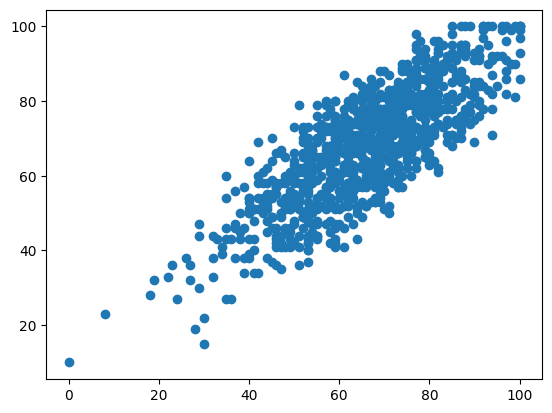

In [8]:
plt.scatter(df_students['math score'], df_students['writing score'])

Good Example : The same plot showing similarity between Gender : Meaning all Males are in Orange color and all feamles are in blue color.
Here Colour was used. Other alternative is to use shapes.
The law of similarity in gestalt theory states that elements that look similar to each other are grouped together in the mind.
As we can in the graph below, females performed well than males in terms of scores.

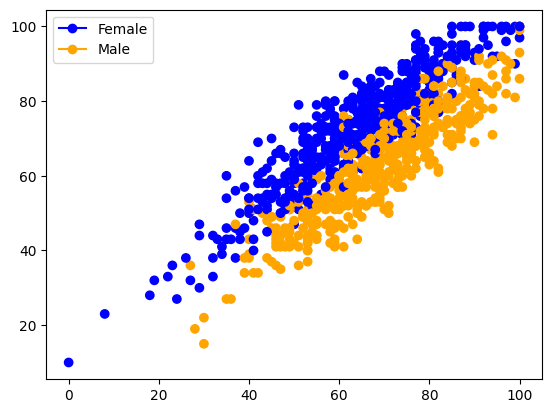

In [9]:

from matplotlib.lines import Line2D 
plt.scatter(df_students['math score'], df_students['writing score'], c=df_students['gender'].map({'male':'orange','female':'blue'}))
#plt.legend([Line2D([0], [0], color=cmap(0.), lw=4),
                #Line2D([0], [0], color=cmap(.5), lw=4)],['Math','Reading'])

#plt.legend([{color:'orange',color:'blue'}],['Math','Reading'])
legend_elements = [Line2D([0], [0], marker='o',color='blue', label='Female'),
                   Line2D([0], [0], marker='o', color='orange', label='Male')]
plt.legend(handles=legend_elements)


### Principle 2 : Connection

In [10]:
df_students.describe()

,math score,reading score,writing score,total
count,1000.0,1000.0,1000.0,1000.0
mean,66.089,69.169,68.054,203.312
std,15.16308,14.600192,15.195657,42.771978
min,0.0,17.0,10.0,27.0
25%,57.0,59.0,57.75,175.0
50%,66.0,70.0,69.0,205.0
75%,77.0,79.0,79.0,233.0
max,100.0,100.0,100.0,300.0


#### Get student marks statistics like mean, median and then plot them

In [11]:
df_student_stats=pd.DataFrame(df_students.describe())
df_student_stats=df_student_stats.loc[['std','mean','50%','75%']][['math score','reading score','writing score']]
df_student_stats


,math score,reading score,writing score
std,15.16308,14.600192,15.195657
mean,66.089,69.169,68.054
50%,66.0,70.0,69.0
75%,77.0,79.0,79.0


#### Bad example : Just plot the statistics of marks for Maths, Reading and Writing

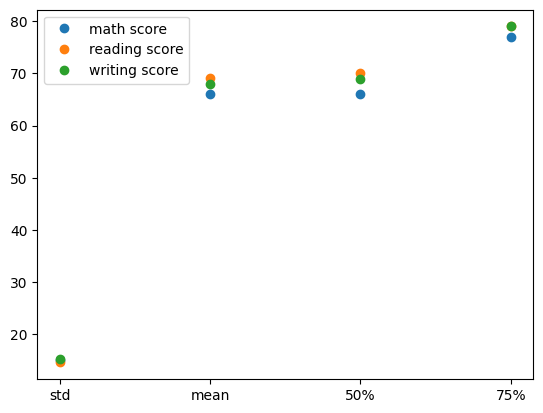

In [12]:
plt.plot(df_student_stats, linestyle='',marker='o')
plt.legend(df_student_stats.columns)


Good Example : Plot the values with a connecting line so that interpretation is easy to see the change is the values, understanding the upward/downward trend.

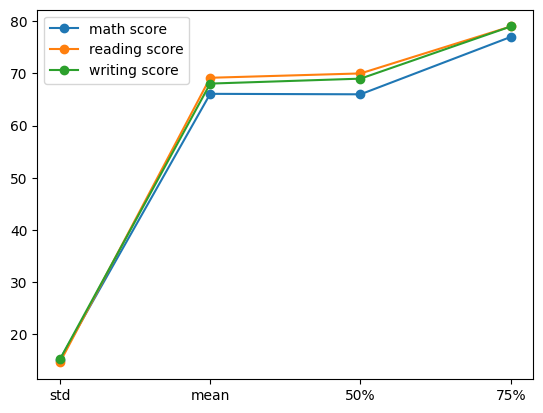

In [13]:
plt.plot(df_student_stats,  marker="o")
#plt.plot(x, y, linestyle="-", marker="o", label="Expenses")
plt.legend(df_student_stats.columns)
plt.show()

### Principle 3 : Proximity

In [14]:
crosstable=pd.crosstab(df_students['gender'],df_students['lunch'])
crosstable

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


<AxesSubplot: xlabel='gender,lunch'>

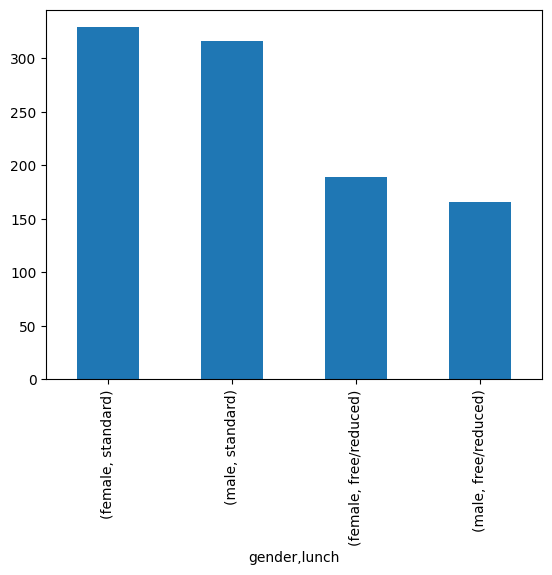

In [15]:
df_students[['gender','lunch']].value_counts().plot(kind='bar')

(<Figure size 640x480 with 3 Axes>,
 {('female', 'standard'): (0.0, 0.0, 0.5154228855721393, 0.6330250516297027),
  ('female', 'free/reduced'): (0.0,
   0.6363473107659153,
   0.5154228855721393,
   0.3636526892340846),
  ('male', 'standard'): (0.5203980099502489,
   0.0,
   0.4796019900497513,
   0.6534235811472132),
  ('male', 'free/reduced'): (0.5203980099502489,
   0.6567458402834259,
   0.4796019900497513,
   0.343254159716574)})

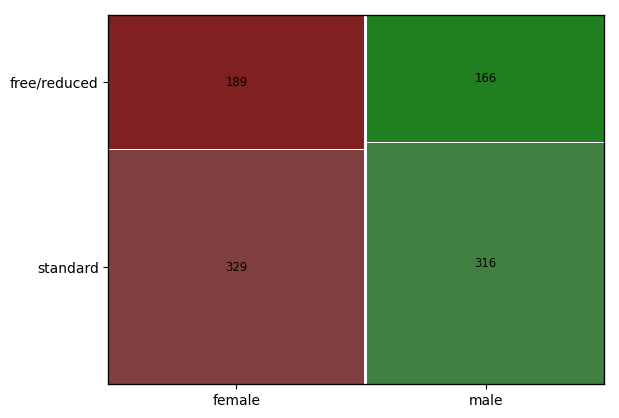

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
labelizer=lambda k:{('male','standard'):316,('female','standard'):329,('male','free/reduced'):166,('female','free/reduced'):189}[k]
mosaic(df_students,['gender','lunch'],labelizer=labelizer)

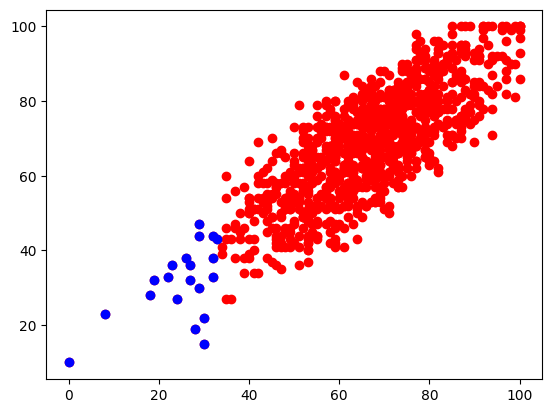

In [17]:
plt.scatter(df_students['math score'], df_students['writing score'], c='r')
df_students=df_students.sort_values(by=['math score'])
df_students_2=df_students[:20]
plt.scatter(df_students_2['math score'], df_students_2['writing score'], c='b')



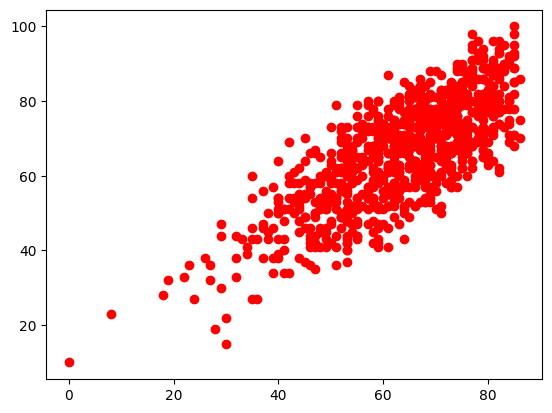

In [18]:
plt.scatter(df_students['math score'][:-100], df_students['writing score'][:-100], c='r')


In [35]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
df2=pca.fit_transform(df_students[['math score','parents education']])
df.shape
df2.shape


(1000, 2)

In [20]:
df2

array([[ -5.94002125,   1.82719172],
       [ -2.9093957 ,  -0.12608983],
       [-23.95335368,   2.54820126],
       ...,
       [  7.10489689,  -0.97104178],
       [ -1.90951572,  -0.11059702],
       [-10.90843554,  -0.25003225]])

In [21]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
df

array([[ -1.25946774,  21.27488196],
       [  7.95760989, -20.7686947 ],
       [  6.99192548,  -9.95598903],
       ...,
       [ 10.80128282,  -6.96024677],
       [ -4.87209638,  12.42393991],
       [ -0.34438903,   6.36555055]])

In [40]:

 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_students[['math score','parents education']])
 
print(label)

[1 4 2 0 1 1 2 3 4 3 4 3 4 1 0 4 2 3 0 0 4 4 0 4 1 1 4 4 1 4 4 4 0 3 2 1 1
 0 1 4 0 4 0 4 0 4 0 4 4 1 0 1 0 2 1 3 1 0 4 3 1 3 4 4 4 4 0 4 4 3 4 4 3 4
 0 0 3 1 4 4 0 0 0 1 0 1 1 1 4 1 4 3 1 0 1 1 4 4 4 4 1 4 2 4 2 4 2 4 0 1 1
 4 0 0 2 2 1 1 0 0 1 2 2 4 2 2 1 4 1 0 2 0 2 1 1 4 0 1 4 1 1 4 0 4 2 3 2 1
 4 2 4 1 4 0 4 1 4 4 4 4 1 1 0 0 1 2 0 4 4 4 1 2 1 4 0 1 0 1 0 2 4 0 0 4 0
 4 1 4 0 1 4 1 4 1 4 4 4 0 0 1 4 4 4 4 4 1 1 1 1 4 1 3 0 4 2 2 2 3 4 4 0 2
 0 2 0 0 1 4 4 2 1 0 4 2 2 1 4 4 0 2 1 1 0 4 1 2 2 4 4 4 0 1 4 1 0 4 4 1 1
 4 4 1 0 2 1 4 4 4 2 1 4 4 0 4 2 2 2 4 4 1 0 0 1 1 3 1 2 4 2 1 1 2 4 4 1 4
 0 1 3 2 1 0 4 1 1 4 2 0 0 0 1 4 4 4 4 1 1 2 4 0 4 1 1 0 3 1 4 3 1 3 1 0 4
 2 2 4 1 0 3 3 4 4 4 4 1 1 4 1 1 2 0 4 4 0 4 4 4 0 4 1 4 2 0 3 4 0 4 4 0 1
 2 0 1 1 4 0 1 2 1 4 1 2 1 3 3 4 4 4 4 1 1 1 1 4 4 0 0 2 1 4 4 0 0 2 0 4 4
 1 0 2 1 2 1 4 0 2 1 1 4 4 1 4 0 4 3 4 2 4 4 4 4 4 4 0 1 0 1 1 1 2 4 1 4 1
 1 4 4 2 0 1 4 2 4 4 0 3 1 0 2 1 0 0 1 1 1 2 3 1 1 2 2 4 4 4 2 1 1 1 0 1 1
 0 4 4 0 1 4 4 4 1 4 4 2 

/Users/harika/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df2

array([[ -5.94002125,   1.82719172],
       [ -2.9093957 ,  -0.12608983],
       [-23.95335368,   2.54820126],
       ...,
       [  7.10489689,  -0.97104178],
       [ -1.90951572,  -0.11059702],
       [-10.90843554,  -0.25003225]])

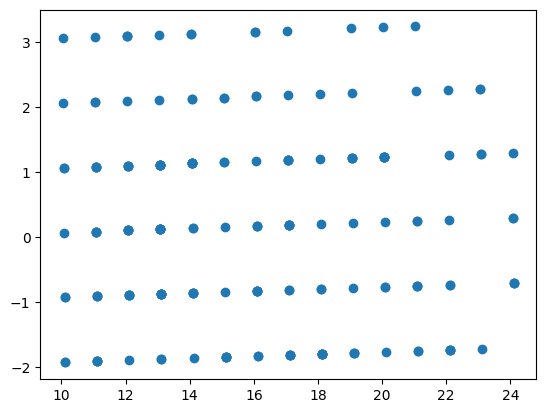

In [41]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df2[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

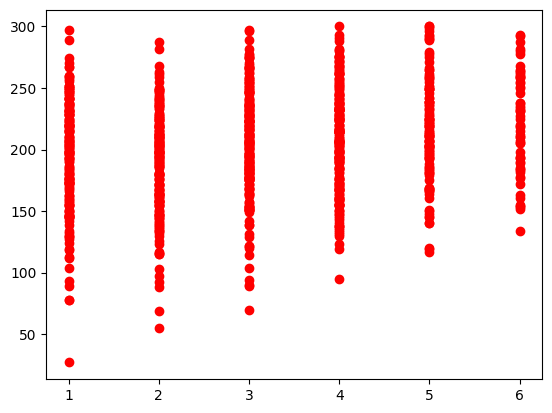

In [42]:
plt.scatter(df_students['parents education'] , df_students['total'] , color = 'red')
#plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

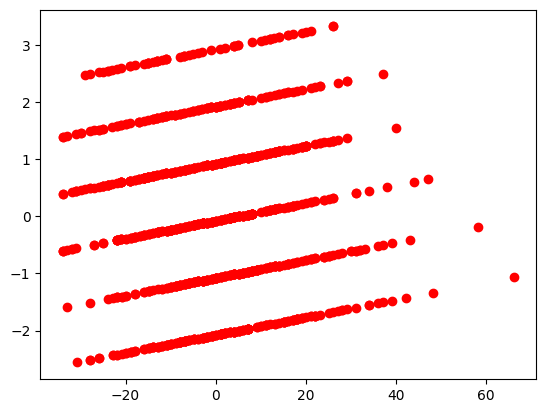

In [47]:
plt.scatter(df2[:,0] , df2[:,1] , color = 'red')

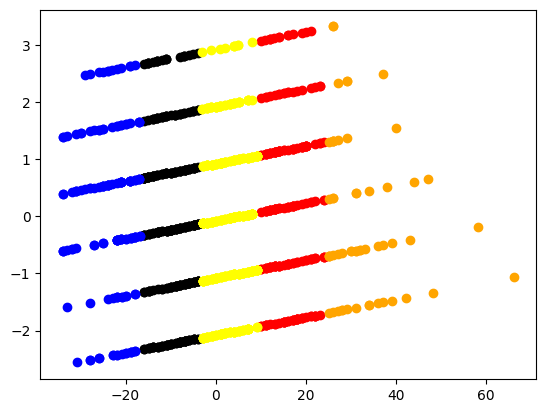

In [46]:
#filter rows of original data
filtered_label0 = df2[label == 0]
filtered_label1 = df2[label == 1]
filtered_label2 = df2[label == 2]
filtered_label3 = df2[label == 3]
filtered_label4 = df2[label == 4]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'blue')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'orange')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'yellow')
plt.show()

In [7]:
X = df_students[['race', 'math score']].copy()
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

ValueError: could not convert string to float: 'group B'

In [19]:
df_students['total'].nlargest(n=5)



458    300
916    300
962    300
114    299
179    297
Name: total, dtype: int64[pyarrow]

In [20]:
df_students['total'].nsmallest(n=5)


59     27
980    55
596    69
327    70
17     78
Name: total, dtype: int64[pyarrow]

In [21]:
nlargest = df_students['total'].nlargest(10)
nsmallest = df_students['total'].nsmallest(10)

nlargest

458    300
916    300
962    300
114    299
179    297
712    297
165    296
625    296
903    293
685    293
Name: total, dtype: int64[pyarrow]

In [22]:

result = pd.concat([df_students.iloc[nlargest.index], df_students.iloc[nsmallest.index]]).sort_index()
print(result)

     gender     race parental level of education         lunch   
42   female  group B          associate's degree      standard  \
66     male  group D            some high school  free/reduced   
100    male  group B                some college      standard   
224  female  group B          associate's degree      standard   
252  female  group B            some high school      standard   
259  female  group C             master's degree  free/reduced   
283  female  group D                some college  free/reduced   
304  female  group C          associate's degree      standard   
357  female  group C                some college  free/reduced   
436    male  group D          associate's degree      standard   
475  female  group D           bachelor's degree      standard   
496  female  group C                some college      standard   
594  female  group C           bachelor's degree      standard   
677  female  group C            some high school      standard   
717  femal

<AxesSubplot: >

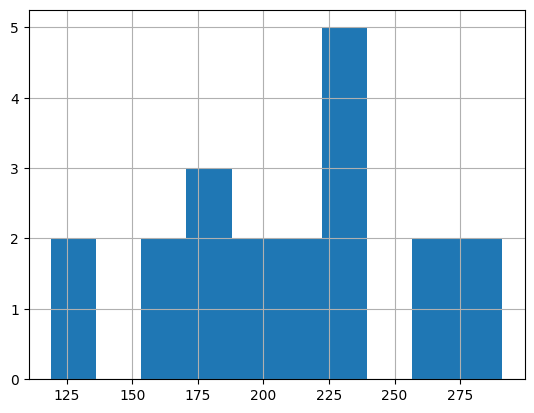

In [23]:
result['total'].hist()

<AxesSubplot: title={'center': 'Histogram plotting Total marks'}, xlabel='Total Marks', ylabel='Frequency'>

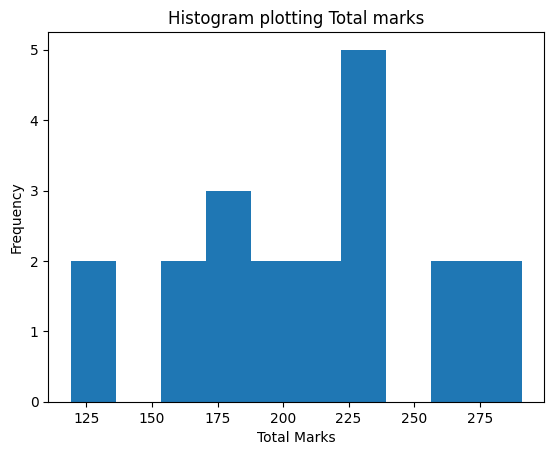

In [24]:
result['total'].plot(kind='hist', title='Histogram plotting Total marks', xlabel='Total Marks')

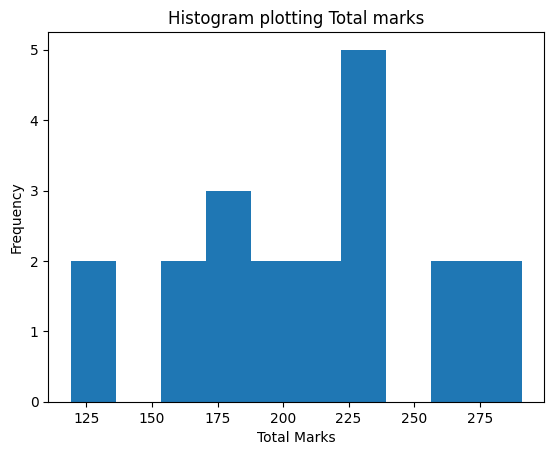

In [25]:
from matplotlib import pyplot as plt, patches
fig = plt.figure()
ax = fig.add_subplot(111)
result['total'].plot(kind='hist', title='Histogram plotting Total marks', xlabel='Total Marks')
rectangle = patches.Rectangle((0, 0), 3, 3, edgecolor='orange',
facecolor="green", linewidth=7)
ax.add_patch(rectangle)
rx, ry = rectangle.get_xy()
cx = rx + rectangle.get_width()/2.0
cy = ry + rectangle.get_height()/2.0
ax.annotate("Rectangle", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')

plt.show()


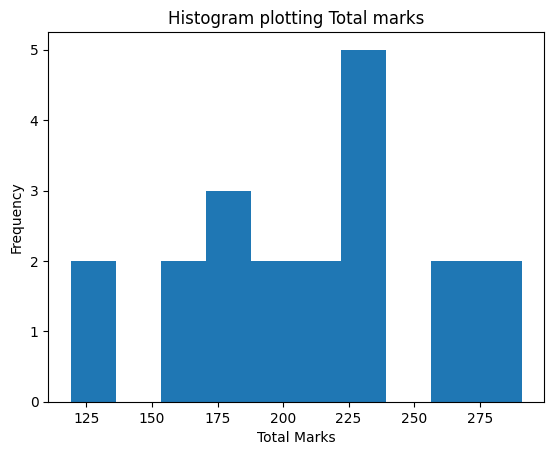

In [26]:
import plotly.graph_objects as go

# The Figure() function creates a triangle and a rectangle.
result['total'].plot(kind='hist', title='Histogram plotting Total marks', xlabel='Total Marks')
fig = go.Figure(go.Scatter(x=[3,3,5,5,3], y=[0.5,1.5,1.5,0.5,0.5]))

fig.show()



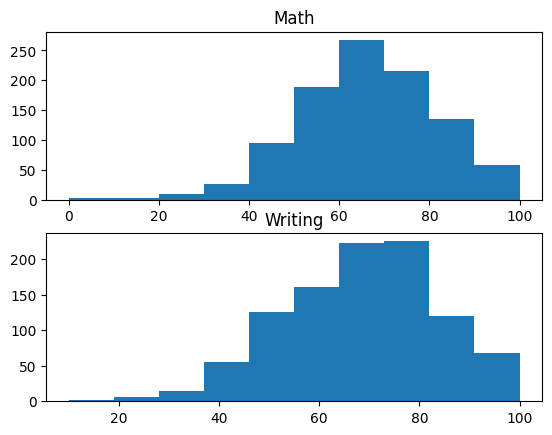

In [27]:
figure, axis = plt.subplots(2)
df_students_male=df_students[df_students['gender']=='male']
df_students_female=df_students[df_students['gender']=='female']

# For Sine Function
axis[0].hist( df_students['math score'])

axis[0].set_title("Math")
  
# For Cosine Function
axis[1].hist(df_students['writing score'])
axis[1].set_title("Writing")
  
# axis[2].hist(df_students['reading score'])
# axis[2].set_title("Reading")
# For Tangent Function
# axis[1, 0].plot(X, Y3)
# axis[1, 0].set_title("Tangent Function")
  
# # For Tanh Function
# axis[1, 1].plot(X, Y4)
# axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()

(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 60.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

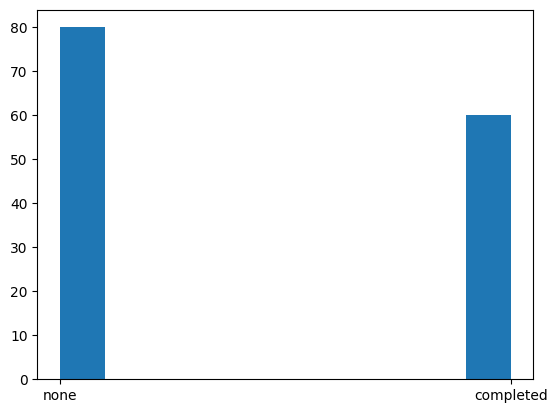

In [28]:
plt.hist(df_students[df_students['race']=='group E']['test preparation course'])

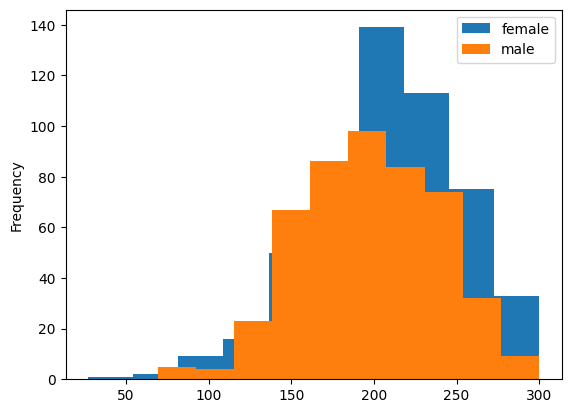

In [29]:
df_students.groupby('gender')['total'].plot(kind='hist')
plt.legend()
#df_students_male['total'].plot(kind='kde')
